In [1]:
import cv2

In [ ]:
# specify folder that contains our YOLO model files
yolo = 'yolo-coco'

# specify the path to our test image
img = 'images/test.jpg'

# derive the paths to the YOLO weights and model configuration
weightsPath = os.path.sep.join([yolo, "yolov3.weights"])
configPath = os.path.sep.join([yolo, "yolov3.cfg"])

In [11]:
cap = cv2.VideoCapture(5)

In [12]:
cap

<VideoCapture 0x11f977670>

In [ ]:
video = 'videos/car_chase_01.mp4'

In [14]:
pedestrian_cascade = cv2.CascadeClassifier('/Users/Alexanderhubbard/Documents/projects/object-detection/videos/car_chase_01.mp4')

SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set

In [15]:
while True:
    # reads frames from a video
    ret, frames = cap.read()
    # convert to gray scale of each frames
    #gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
    # Detects pedestrians of different sizes in the input image
    pedestrians = pedestrian_cascade.detectMultiScale( frames, 1.1, 
    1)
    # To draw a rectangle in each pedestrians
    for (x,y,w,h) in pedestrians:
        cv2.rectangle(frames,(x,y),(x+w,y+h),(0,255,0),2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frames, 'Person', (x + 6, y - 6), font, 0.5, (0, 
        255, 0), 1)
        # Display frames in a window
        cv2.imshow('Pedestrian detection', frames)
    # Wait for Enter key to stop
    if cv2.waitKey(33) == 13:
        break

NameError: name 'pedestrian_cascade' is not defined

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img_raw = cv2.imread('../../data/victim/35/breitrickevelg.jpg')

In [4]:
type(img_raw)

numpy.ndarray

In [5]:
img_raw.shape

(300, 240, 3)

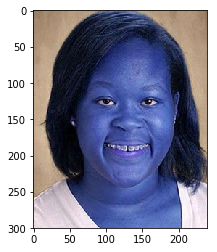

In [6]:
plt.imshow(img_raw)

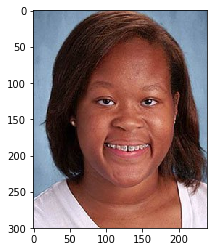

In [7]:
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)

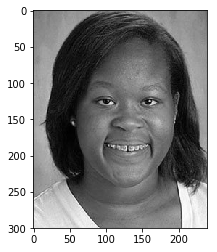

In [8]:
#Loading the image to be tested
test_image = cv2.imread('../../data/victim/35/breitrickevelg.jpg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

In [94]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [95]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [69]:
img = 'images/test.jpg'

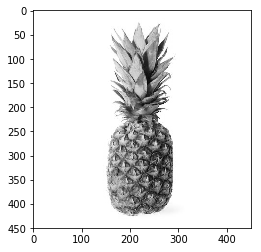

In [70]:
#Loading the image to be tested
test_image_2 = cv2.imread('pin.jpeg')

#Converting to grayscale
test_image_gray_2 = cv2.cvtColor(test_image_2, cv2.COLOR_BGR2GRAY)

plt.imshow(test_image_gray_2, cmap='gray')

In [71]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray_2, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  0


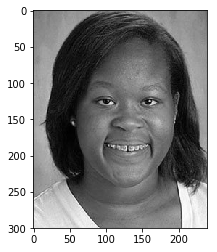

In [103]:
#Loading the image to be tested
test_image = cv2.imread('../../data/victim/35/breitrickevelg.jpg')
# test_image_2 = cv2.imread('../../data/victim/37/oswaltconnerjacklg.jpg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

plt.imshow(test_image_gray, cmap='gray')


In [105]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [74]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [75]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

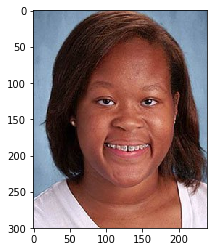

In [76]:
#convert image to RGB and show image

plt.imshow(convertToRGB(test_image))

In [77]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy

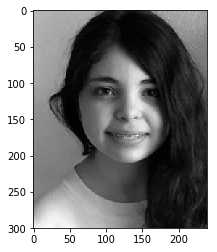

In [78]:
#loading image
test_image2 = cv2.imread('../../data/victim/40/navarroalicialg.jpg')

# Converting to grayscale
test_image_gray = cv2.cvtColor(test_image2, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

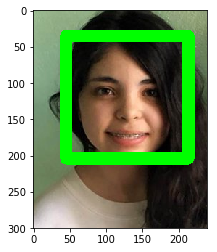

In [79]:
#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

How Many Photos can I recognize a face?
==

In [2]:
import pandas as pd
import psycopg2
import urllib.parse as urlparse
import os
## fast writes
from sqlalchemy import event, create_engine
import psycopg2.extras
import psycopg2.errorcodes

def open_connection():
    connection = psycopg2.connect(
        database=os.environ['RACK_DATABASE'],
        user=os.environ['RACK_USERNAME'],
        password=os.environ['RACK_PASSWORD'],
        host=os.environ['RACK_HOST'],
        port=os.environ['RACK_PORT']
        )
    return connection

In [3]:
victim_with_id = pd.read_sql_query("select * from victim_photo", open_connection())
victim_with_id

,id,url
0,35,http://www.pollyklaas.org/missing/kids/breitri...
1,36,http://www.pollyklaas.org/missing/kids/person-...
2,37,http://www.pollyklaas.org/missing/kids/oswaltc...
3,38,http://www.pollyklaas.org/missing/kids/images/...
4,39,http://www.pollyklaas.org/missing/kids/images/...
5,40,http://www.pollyklaas.org/missing/kids/navarro...
6,41,http://www.pollyklaas.org/missing/kids/images/...
7,42,http://www.pollyklaas.org/missing/kids/images/...
8,43,http://www.pollyklaas.org/missing/kids/dennard...
9,44,http://www.pollyklaas.org/missing/kids/images/...


In [134]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
not_image = []
not_image_stuff = []
for i in victim_with_id.index:
    url = victim_with_id.loc[i, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    id_ = victim_with_id.loc[i, 'id']
    path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)
    print(path)

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces_rects = haar_cascade_face.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
    
    victim_with_id.loc[i, 'face'] = len(faces_rects) > 0
    
    if len(faces_rects) == 0:
        not_image.append(i)
        not_image_stuff.append(faces_rects)

../../data/victim/35/breitrickevelg.jpg
../../data/victim/36/person-wilsonzyaiaslg.jpg
../../data/victim/37/oswaltconnerjacklg.jpg
../../data/victim/38/vallow.jpg
../../data/victim/39/ryantylee.jpg
../../data/victim/40/navarroalicialg.jpg
../../data/victim/41/alexander.jpg
../../data/victim/42/emily.jpg
../../data/victim/43/dennardserenitylg.jpg
../../data/victim/44/danzanick.jpg
../../data/victim/45/gusekarlie.jpg
../../data/victim/46/unbehaunheather.jpg
../../data/victim/47/escarenomarissa.jpg
../../data/victim/48/faith-king-basey-98658.jpg
../../data/victim/49/e-moore-1.jpg
../../data/victim/50/riosenriquelg-1.jpg
../../data/victim/51/stinelashaya1lg.jpg
../../data/victim/52/curryadindalg-1.jpg
../../data/victim/53/pinsonpearl.jpg
../../data/victim/54/balimekaylalg.jpg
../../data/victim/55/kunzdeorrlg-1.jpg
../../data/victim/56/grahamember.jpg
../../data/victim/57/maxvilleveronicalg.jpg
../../data/victim/58/villamaxinelg.jpg
../../data/victim/59/ruddrelisha.jpg
../../data/victim/60/

In [118]:
victim_with_id

,id,url,face
0,35,http://www.pollyklaas.org/missing/kids/breitri...,True
1,36,http://www.pollyklaas.org/missing/kids/person-...,True
2,37,http://www.pollyklaas.org/missing/kids/oswaltc...,False
3,38,http://www.pollyklaas.org/missing/kids/images/...,True
4,39,http://www.pollyklaas.org/missing/kids/images/...,True
5,40,http://www.pollyklaas.org/missing/kids/navarro...,True
6,41,http://www.pollyklaas.org/missing/kids/images/...,True
7,42,http://www.pollyklaas.org/missing/kids/images/...,True
8,43,http://www.pollyklaas.org/missing/kids/dennard...,True
9,44,http://www.pollyklaas.org/missing/kids/images/...,True


In [136]:
not_image_stuff

[(), (), (), ()]

In [137]:
not_image

[2, 10, 16, 18]

In [138]:
len(not_image)

4

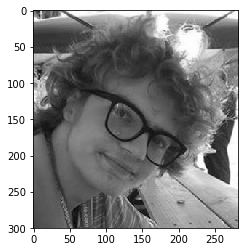

In [139]:
i = not_image[0]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

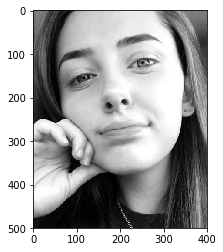

In [140]:
i = not_image[1]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

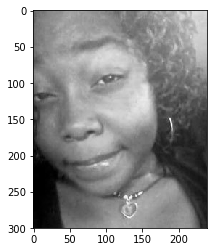

In [141]:
i = not_image[2]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

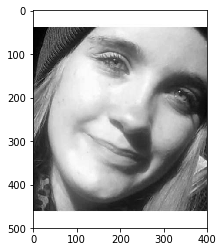

In [142]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
i = not_image[3]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

In [143]:
haar_cascade_face.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);

Recognize eyes
==

In [4]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_eye.xml')
i = not_image[3]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)
print(path)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces_rects = haar_cascade_face.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
print(faces_rects)
plt.imshow(image, cmap='gray')

NameError: name 'not_image' is not defined

()


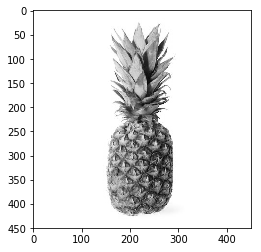

In [148]:
image = cv2.imread('pin.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces_rects = haar_cascade_face.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
print(faces_rects)
plt.imshow(image, cmap='gray')

How many identify eyes?
==

In [5]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
haar_cascade_eyes = cv2.CascadeClassifier('haarcascade_eye.xml')
not_image = []
not_image_stuff = []
for i in victim_with_id.index:
    url = victim_with_id.loc[i, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    id_ = victim_with_id.loc[i, 'id']
    path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)
    print(path)

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces_rects = haar_cascade_face.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
    eyess_rects = haar_cascade_eyes.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
    
    
    victim_with_id.loc[i, 'face'] = len(faces_rects) > 0
    victim_with_id.loc[i, 'eyes'] = len(eyess_rects) > 0
    
    if len(eyess_rects) == 0:
        not_image.append(i)
        not_image_stuff.append(faces_rects)

../../data/victim/35/breitrickevelg.jpg
../../data/victim/36/person-wilsonzyaiaslg.jpg
../../data/victim/37/oswaltconnerjacklg.jpg
../../data/victim/38/vallow.jpg
../../data/victim/39/ryantylee.jpg
../../data/victim/40/navarroalicialg.jpg
../../data/victim/41/alexander.jpg
../../data/victim/42/emily.jpg
../../data/victim/43/dennardserenitylg.jpg
../../data/victim/44/danzanick.jpg
../../data/victim/45/gusekarlie.jpg
../../data/victim/46/unbehaunheather.jpg
../../data/victim/47/escarenomarissa.jpg
../../data/victim/48/faith-king-basey-98658.jpg
../../data/victim/49/e-moore-1.jpg
../../data/victim/50/riosenriquelg-1.jpg
../../data/victim/51/stinelashaya1lg.jpg
../../data/victim/52/curryadindalg-1.jpg
../../data/victim/53/pinsonpearl.jpg
../../data/victim/54/balimekaylalg.jpg
../../data/victim/55/kunzdeorrlg-1.jpg
../../data/victim/56/grahamember.jpg
../../data/victim/57/maxvilleveronicalg.jpg
../../data/victim/58/villamaxinelg.jpg
../../data/victim/59/ruddrelisha.jpg
../../data/victim/60/

In [6]:
victim_with_id.loc[victim_with_id['eyes'] == False]

,id,url,face,eyes
13,48,http://www.pollyklaas.org/missing/kids/images/...,True,False
27,62,http://www.pollyklaas.org/missing/kids/images/...,True,False
28,63,http://www.pollyklaas.org/missing/kids/images/...,True,False


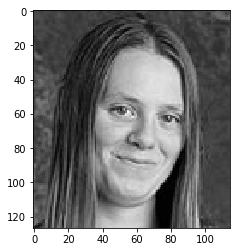

In [9]:
i = not_image[0]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

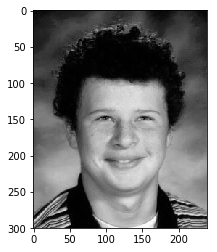

In [10]:
i = not_image[1]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

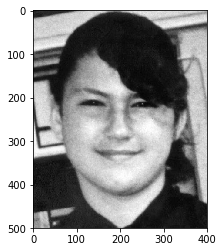

In [11]:
i = not_image[2]
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

In [12]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [13]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
image = cv2.imread(path)
# Convert into grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x,y,w,h) in faces_rects:
     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
# Display the output
# cv2.imshow('img', image)
# cv2.waitKey()

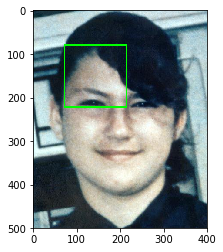

In [15]:
plt.imshow(convertToRGB(image))

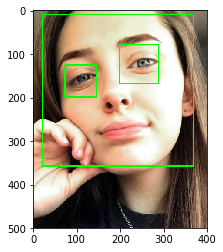

In [79]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
haar_cascade_eyes = cv2.CascadeClassifier('haarcascade_eye.xml')


i = 10
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)

image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    image_gray = gray[y:y+h, x:x+w]
    image_color = image[y:y+h, x:x+w]
    

eyes_var = 0
eyes_good = False
while eyes_good:
    eyes_var += 5 
    eyes = haar_cascade_eyes.detectMultiScale(gray, 1.1, eyes_var)
    if len(eyes)/len(faces) == 2:
        eyes_good = True
    elif eyes_var > 50:
        eyes_good = True
        
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    image_gray = gray[ey:ey+eh, ex:ex+ew]
    image_color = image[ey:ey+eh, ex:ex+ew]

plt.imshow(convertToRGB(image))

Try to get faces again
==

In [86]:
for i in victim_with_id.index:
    url = victim_with_id.loc[i, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    id_ = victim_with_id.loc[i, 'id']
    path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)
    print(path)

    ## get image
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ## find face
    faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
    for (x,y,w,h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        image_gray = gray[y:y+h, x:x+w]
        image_color = image[y:y+h, x:x+w]


    ## find eyes
    ## move threshold based on number of faces
    eyes_var = 0
    eyes_good = False
    while eyes_good:
        eyes_var += 5 
        eyes = haar_cascade_eyes.detectMultiScale(gray, 1.1, eyes_var)
        if len(eyes)/len(faces) == 2:
            eyes_good = True
        elif eyes_var > 50:
            eyes_good = True
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        image_gray = gray[ey:ey+eh, ex:ex+ew]
        image_color = image[ey:ey+eh, ex:ex+ew]
    
    
    victim_with_id.loc[i, 'face'] = len(faces) > 0
    victim_with_id.loc[i, 'eyes'] = len(eyes) > 0

../../data/victim/35/breitrickevelg.jpg
../../data/victim/36/person-wilsonzyaiaslg.jpg
../../data/victim/37/oswaltconnerjacklg.jpg
../../data/victim/38/vallow.jpg
../../data/victim/39/ryantylee.jpg
../../data/victim/40/navarroalicialg.jpg
../../data/victim/41/alexander.jpg
../../data/victim/42/emily.jpg
../../data/victim/43/dennardserenitylg.jpg
../../data/victim/44/danzanick.jpg
../../data/victim/45/gusekarlie.jpg
../../data/victim/46/unbehaunheather.jpg
../../data/victim/47/escarenomarissa.jpg
../../data/victim/48/faith-king-basey-98658.jpg
../../data/victim/49/e-moore-1.jpg
../../data/victim/50/riosenriquelg-1.jpg
../../data/victim/51/stinelashaya1lg.jpg
../../data/victim/52/curryadindalg-1.jpg
../../data/victim/53/pinsonpearl.jpg
../../data/victim/54/balimekaylalg.jpg
../../data/victim/55/kunzdeorrlg-1.jpg
../../data/victim/56/grahamember.jpg
../../data/victim/57/maxvilleveronicalg.jpg
../../data/victim/58/villamaxinelg.jpg
../../data/victim/59/ruddrelisha.jpg
../../data/victim/60/

In [89]:
victim_with_id.loc[victim_with_id['face'] == False]

,id,url,face,eyes
2,37,http://www.pollyklaas.org/missing/kids/oswaltc...,False,True
16,51,http://www.pollyklaas.org/missing/kids/images/...,False,True
18,53,http://www.pollyklaas.org/missing/kids/images/...,False,True


Good Enough
==

Try me

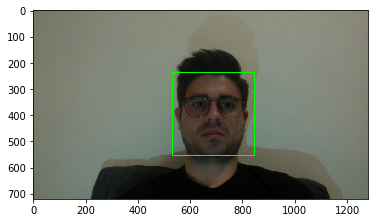

In [111]:
cap = cv2.VideoCapture(0)
ret, image = cap.read()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    image_gray = gray[y:y+h, x:x+w]
    image_color = image[y:y+h, x:x+w]
    
if len(faces) == 0:
    eyes_var = 0
    eyes_good = False
    while eyes_good:
        eyes_var += 5 
        print(eyes_var)
        eyes = haar_cascade_eyes.detectMultiScale(gray, 1.1, eyes_var)
        if len(eyes)/len(faces) == 2:
            eyes_good = True
        elif eyes_var > 50:
            eyes_good = True

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

        image_gray = gray[ey:ey+eh, ex:ex+ew]
        image_color = image[ey:ey+eh, ex:ex+ew]

plt.imshow(convertToRGB(image))

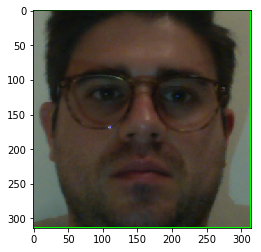

In [113]:
plt.imshow(convertToRGB(image_color))